# Import necessary libraries

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Generating Data Points ourselves

In [114]:
for i in range(2):
    print(i)

0
1


In [115]:
np.random.seed(42)
n_groups = 5
group_size = 50

data = {
    "group": np.repeat([f"Group {i + 1}" for i in range(n_groups)], group_size),
    "x": np.random.uniform(0, 10, n_groups * group_size),
    "z": np.random.normal(0, 64, n_groups * group_size),
}

# Creating Dependent Variable $(y)$ using $Fixed Effects$ and $Random Effects$

### Look there are added random effects for Intercepts here

In [116]:
data["y"] = (
    2.0  # Intercept
    + 0.5 * data["x"]  # Fixed effect of x
    + np.random.normal(0, 1, n_groups * group_size)  # Residual error
    + np.random.normal(0, 2, n_groups).repeat(group_size)  # Random intercept per group
)

# Create a DataFrame
df = pd.DataFrame(data)
df

,group,x,z,y
0,Group 1,3.745401,-54.194798,3.591238
1,Group 1,9.507143,-96.950222,8.119944
2,Group 1,7.319939,-28.576957,7.465955
3,Group 1,5.986585,54.809523,6.382518
4,Group 1,1.560186,13.702000,2.134571
...,...,...,...,...
245,Group 5,9.283186,45.922704,4.968841
246,Group 5,4.281841,96.150851,0.756666
247,Group 5,9.666548,4.742066,5.384146
248,Group 5,9.636200,104.231395,4.415648


# Plotting $Box Plot$ to better visualize data by Groups

/tmp/ipykernel_5664/4264149335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="y", data=df, palette="tab10")


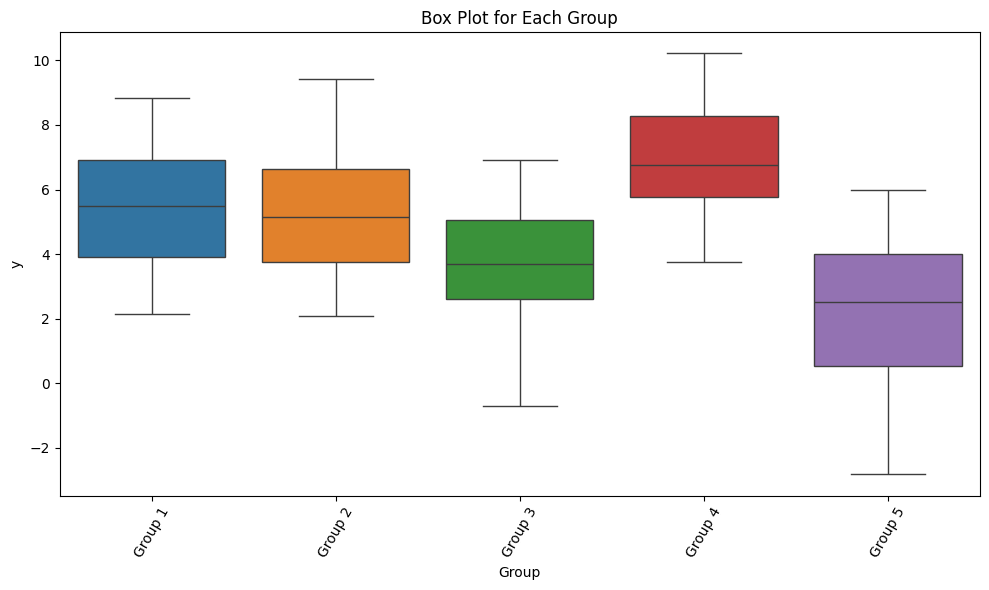

In [117]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="group", y="y", data=df, palette="tab10")
plt.title("Box Plot for Each Group")
plt.xlabel("Group")
plt.xticks(rotation=60)
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Fitting a linear mixed model

In [118]:
model = MixedLM(df["y"], sm.add_constant(df["x"]), groups=df["group"])
result = model.fit()

# Model summary
print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 250     Method:             REML     
No. Groups:       5       Scale:              1.0376   
Min. group size:  50      Log-Likelihood:     -373.2423
Max. group size:  50      Converged:          Yes      
Mean group size:  50.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
const         2.227    0.824  2.702 0.007  0.612  3.842
x             0.508    0.022 23.332 0.000  0.466  0.551
Group Var     3.318    2.336                           



# Visualization of model predictions

In [119]:
result.params

const        2.226958
x            0.508399
Group Var    3.197649
dtype: float64

In [121]:
result.random_effects

{'Group 1': Group Var    0.924898
 dtype: float64,
 'Group 2': Group Var    0.415901
 dtype: float64,
 'Group 3': Group Var   -0.967279
 dtype: float64,
 'Group 4': Group Var    2.174983
 dtype: float64,
 'Group 5': Group Var   -2.548504
 dtype: float64}

/tmp/ipykernel_5664/446814712.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_effect = result.random_effects[group][0]  # Access the random intercept


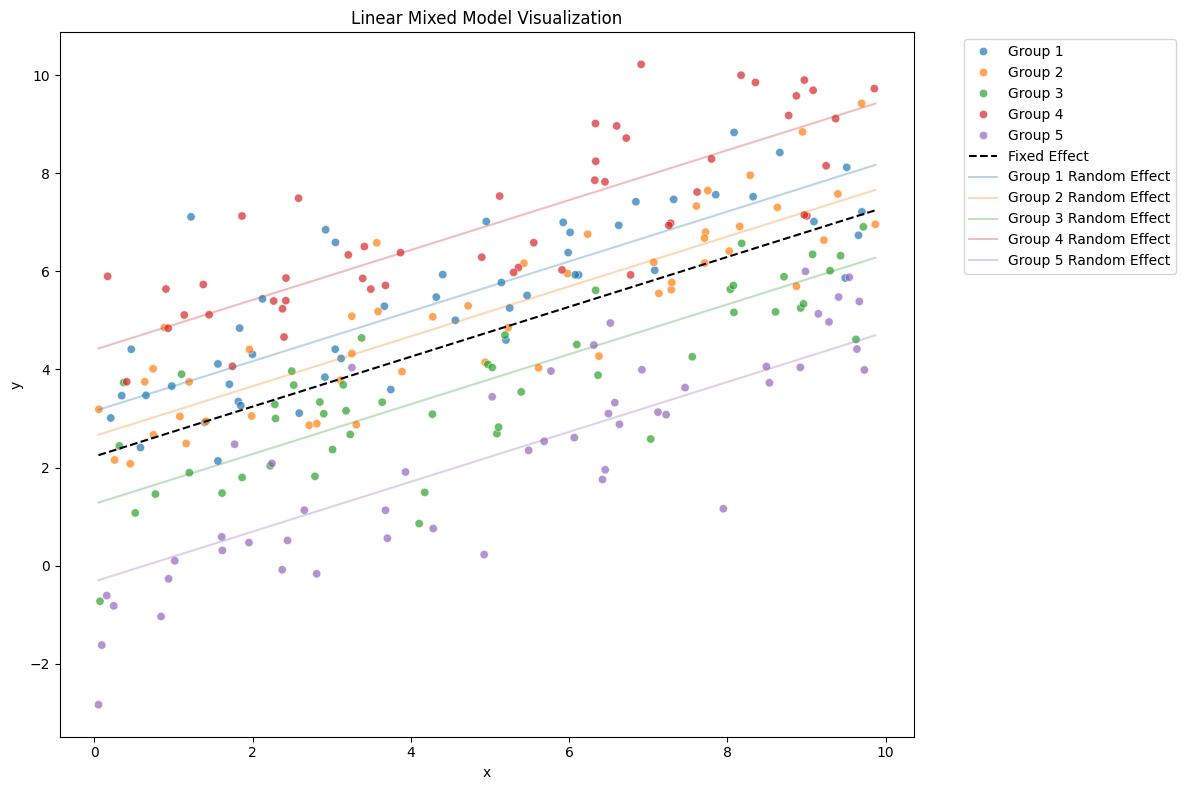

In [107]:

plt.figure(figsize=(12, 8))

# Plot the data with group-specific random effects
sns.scatterplot(x="x", y="y", hue="group", data=df, palette="tab10", alpha=0.7)

# Add fixed-effect regression line
x_vals = np.linspace(df["x"].min(), df["x"].max(), 100)
# y= m x + c
y_vals = result.params["const"] + result.params["x"] * x_vals
plt.plot(x_vals, y_vals, color="black", linestyle="--", label="Fixed Effect")

# Add random effects
for group in df["group"].unique():
    random_effect = result.random_effects[group][0]  # Access the random intercept
    y_vals_group = result.params["const"] + result.params["x"] * x_vals + random_effect
    plt.plot(x_vals, y_vals_group, alpha=0.3, label=f"{group} Random Effect")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Linear Mixed Model Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


# Now visualizing after adding $Random Effect Slope$ in the data

In [122]:
np.random.seed(42)
n_groups = 5
group_size = 20
# Generate data with random intercepts and slopes
data = {
    "group": np.repeat([f"Group {i + 1}" for i in range(n_groups)], group_size),
    "x": np.random.uniform(0, 20, n_groups * group_size),
    "z": np.random.normal(0, 1, n_groups * group_size),
}

# Generate random intercepts and slopes for each group
random_intercepts = np.random.normal(0, 2, n_groups)  # Random intercepts with SD=2
random_slopes = np.random.normal(0, 0.5, n_groups)    # Random slopes with SD=0.5

data["y"] = (
    2.0  # Fixed intercept
    + 0.5 * data["x"]  # Fixed slope
    + np.repeat(random_intercepts, group_size)  # Random intercepts
    + np.repeat(random_slopes, group_size) * data["x"]  # Random slopes
    + np.random.normal(0, 1, n_groups * group_size)  # Residual error
)

df = pd.DataFrame(data)
df.sample(10)

,group,x,z,y
65,Group 4,10.853922,1.307143,12.572437
14,Group 1,3.636499,0.097078,2.643514
81,Group 5,12.465963,0.473833,12.504526
76,Group 4,15.425407,-0.680025,10.188272
84,Group 5,6.219646,-0.974682,10.022847
83,Group 5,1.271167,0.656554,4.471466
5,Group 1,3.119890,0.357113,3.105229
17,Group 1,10.495129,-0.327662,3.829381
0,Group 1,7.490802,0.087047,3.034244
49,Group 3,3.697089,2.190456,4.845022


In [123]:
# Fit linear mixed model with random intercept and slope
exog = sm.add_constant(df[["x"]])  # Fixed effects design matrix
exog_re = exog.copy()              # Random effects design matrix (includes intercept and x)

model = MixedLM(df["y"], exog, groups=df["group"], exog_re=exog_re)
result = model.fit()

# Print model summary
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 100     Method:             REML     
No. Groups:       5       Scale:              1.2730   
Min. group size:  20      Log-Likelihood:     -174.8356
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
const          3.777    1.031 3.664 0.000  1.757  5.797
x              0.410    0.176 2.331 0.020  0.065  0.755
const Var      5.083    3.391                          
const x x Cov -0.216    0.416                          
x Var          0.153    0.099                          



In [124]:
result.random_effects

{'Group 1': const   -1.726082
 x       -0.355043
 dtype: float64,
 'Group 2': const    1.340841
 x       -0.426455
 dtype: float64,
 'Group 3': const   -2.264458
 x        0.318608
 dtype: float64,
 'Group 4': const    3.063262
 x        0.021880
 dtype: float64,
 'Group 5': const   -0.413563
 x        0.441010
 dtype: float64}

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", hue="group", data=df, palette="tab10", alpha=0.7)

# Fixed effects line
x_vals = np.linspace(df["x"].min(), df["x"].max(), 100)
y_vals_fixed = result.params["const"] + result.params["x"] * x_vals
plt.plot(x_vals, y_vals_fixed, color="black", linestyle="--", label="Fixed Effect")

# Add group-specific random effects lines
for group in df["group"].unique():
    # Get random effects (intercept and slope)
    re = result.random_effects[group]
    random_intercept = re[0]
    random_slope = re[1]

    # Calculate group-specific line
    y_vals_group = (result.params["const"] + random_intercept) + (
        result.params["x"] + random_slope
    ) * x_vals
    plt.plot(x_vals, y_vals_group, alpha=0.5, label=f"{group} Random Effects")

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Linear Mixed Model with Random Intercepts and Slopes")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5664/726611754.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_intercept = re[0]
/tmp/ipykernel_5664/726611754.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_slope = re[1]
